# Activity 9

1. Import the necessary libraries, including regex and beautifulsoup.

In [24]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

2. Check the SSL certificate.

In [25]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

3. Read the HTML from the URL.

In [26]:
url = 'https://www.gutenberg.org/browse/scores/top'

In [27]:
url_response = requests.get(url)

4. Write a small function to check the status of the web request.

In [28]:
def status_check(response):
    if response.status_code == 200:
        print("You are connected.")
    else:
        print("Try again. Connection failed")

In [29]:
status_check(url_response)

You are connected.


5. Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [30]:
url_content = url_response.content.decode(url_response.encoding)

In [31]:
soup = BeautifulSoup(url_content, 'html.parser')

6. Find all the href tags and store them in the list of links. Check what the list looks
like – print the first 30 elements.

In [32]:
href_list = []

In [33]:
for link in soup.find_all('a'):
    href_list.append(link.get('href'))

In [34]:
href_list[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1']

7. Use a regular expression to find the numeric digits in these links. These are the file
numbers for the top 100 eBooks.

8. Initialize the empty list to hold the file numbers over an appropriate range and use
regex to find the numeric digits in the link href string. Use the findall method.

In [35]:
file_nums = []

In [43]:
for i in range(33, 133):
    link = href_list[i]
    link = link.strip()
    num = re.findall('[0-9]+',link)
    if len(num) == 1:
        file_nums.append(int(num[0]))

In [44]:
file_nums

[22381,
 30,
 84,
 1342,
 1513,
 25344,
 345,
 5200,
 67990,
 64317,
 33283,
 11,
 174,
 844,
 1952,
 2542,
 1080,
 43,
 1260,
 98,
 1661,
 25282,
 41,
 1232,
 2591,
 71944,
 1400,
 71941,
 408,
 6130,
 2701,
 71945,
 71939,
 71943,
 71942,
 28054,
 31284,
 76,
 23,
 2554,
 46,
 1399,
 219,
 2814,
 27827,
 205,
 2600,
 768,
 3207,
 55,
 932,
 996,
 2148,
 41445,
 10007,
 1184,
 16,
 4300,
 1727,
 45,
 24869,
 5740,
 244,
 16328,
 7370,
 3825,
 42324,
 74,
 2000,
 71940,
 15399,
 2852,
 71937,
 1250,
 514,
 2680,
 6133,
 1497,
 30254,
 67098,
 58585,
 600,
 8800,
 160,
 2500,
 1251,
 4363,
 8492,
 10,
 71936,
 11030,
 512,
 203,
 20203,
 375,
 4217,
 35899,
 1998,
 120,
 35,
 22381,
 30,
 84,
 1342,
 1513,
 25344,
 345,
 5200,
 67990,
 64317,
 33283,
 11,
 174,
 844,
 1952,
 2542,
 1080,
 43,
 1260,
 98,
 1661,
 25282,
 41,
 1232,
 2591,
 71944,
 1400,
 71941,
 408,
 6130,
 2701,
 71945,
 71939,
 71943,
 71942,
 28054,
 31284,
 76,
 23,
 2554,
 46,
 1399,
 219,
 2814,
 27827,
 205,
 260

9. What does the soup object's text look like? Use the .text method and print only the
first 2,000 characters (do not print the whole thing, as it is too long).

In [45]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not considered.
Books made out of mult

10. Search in the extracted text (using a regular expression) from the soup object to
find the names of the top 100 eBooks (yesterday's ranking).

In [47]:
ebooks = []

11. Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use
the splitlines method of soup.text. It splits the lines of text of the soup object.

In [53]:
starting_index = soup.text.splitlines().index('Top 100 EBooks yesterday') + 9

12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use
the splitlines method.

In [54]:
for i in range(101):
    ebooks.append(soup.text.splitlines()[starting_index + i])

In [55]:
ebooks

['The Great Gatsby by F. Scott  Fitzgerald (1160)',
 'Calculus Made Easy by Silvanus P.  Thompson (1137)',
 "Alice's Adventures in Wonderland by Lewis Carroll (1137)",
 'The Picture of Dorian Gray by Oscar Wilde (936)',
 'The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (930)',
 'The Yellow Wallpaper by Charlotte Perkins Gilman (915)',
 "A Doll's House : a play by Henrik Ibsen (902)",
 'A Modest Proposal by Jonathan Swift (888)',
 'The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (845)',
 'Jane Eyre: An Autobiography by Charlotte Brontë (768)',
 'A Tale of Two Cities by Charles Dickens (737)',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle (672)',
 'The Jewish State by Theodor Herzl (662)',
 'The Legend of Sleepy Hollow by Washington Irving (649)',
 'The Prince by Niccolò Machiavelli (643)',
 "Grimms' Fairy Tales by Jacob Grimm and Wilhelm Grimm (627)",
 'Fragments of voyages and travels, including anecdotes of a naval 

13. Use a regular expression to extract only text from the name strings and append it
to an empty list. Use match and span to find the indices and use them.

In [56]:
top_100_text = []

In [57]:
for i in range(100):
    start,stop = re.match('^[a-zA-Z ]*',ebooks[i]).span()
    top_100_text.append(ebooks[i][start:stop])

In [58]:
top_100_text

['The Great Gatsby by F',
 'Calculus Made Easy by Silvanus P',
 'Alice',
 'The Picture of Dorian Gray by Oscar Wilde ',
 'The Importance of Being Earnest',
 'The Yellow Wallpaper by Charlotte Perkins Gilman ',
 'A Doll',
 'A Modest Proposal by Jonathan Swift ',
 'The Strange Case of Dr',
 'Jane Eyre',
 'A Tale of Two Cities by Charles Dickens ',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle ',
 'The Jewish State by Theodor Herzl ',
 'The Legend of Sleepy Hollow by Washington Irving ',
 'The Prince by Niccol',
 'Grimms',
 'Fragments of voyages and travels',
 'Great Expectations by Charles Dickens ',
 'Children of men by Eden Phillpotts ',
 'The Souls of Black Folk by W',
 'The Iliad by Homer ',
 'Moby Dick',
 'Frank Merriwell',
 'Gratitude by Roy Norton ',
 'Popular lessons in astronomy',
 'Plants and their children by Frances Theodora Parsons ',
 'The Brothers Karamazov by Fyodor Dostoyevsky ',
 'Josefine Mutzenbacher by Felix Salten ',
 'Adventures of Huckleberry Finn by M

# Activity 10

1. Import urllib.request, urllib.parse, urllib.error, and json.

In [59]:
import urllib.request, urllib.parse, urllib.error
import json

2. Load the secret API key (you have to get one from the OMDb website and use that;
it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable,
by using json.loads.

3. Obtain a key and store it in JSON as APIkeys.json.

4. Open the APIkeys.json file.

In [76]:
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdb_api_key = keys['API_key']

5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.

In [77]:
base_url = 'http://www.omdbapi.com/?'

6. Create a variable called apikey with the last portion of the URL
(&apikey=secretapikey), where secretapikey is your own API key.

In [78]:
apikey = '&apikey='+omdb_api_key

7. Write a utility function called print_json to print the movie data from a JSON file
(which we will get from the portal).

In [79]:
def print_json(data):
    keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
            'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings',
            'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    
    for key in keys:
        if key in list(data.keys()):
            print(f"{key}: {data[key]}")

8. Write a utility function to download a poster of the movie based on the
information from the JSON dataset and save it in your local folder. Use the
os module. The poster data is stored in the JSON key Poster. Use the Python
command to open a file and write the poster data. Close the file after you're done.
This function will save the poster data as an image file.

In [80]:
def save_poster(data):
    import os
    title = data['Title']
    poster_url = data['Poster']
    poster_file_extension=poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

9. Write a utility function called search_movie to search for a movie by its name,
print the downloaded JSON data, and save the movie poster in the local folder.
Use a try-except loop for this. Use the previously created serviceurl and apikey
variables. You have to pass on a dictionary with a key, t, and the movie name as
the corresponding value to the urllib.parse.urlencode() function and then add
the serviceurl and apikey to the output of the function to construct the full URL.
This URL will be used to access the data. The JSON data has a key called Response.
If it is True, that means the read was successful. Check this before processing the
data. If it's not successful, then print the JSON key Error, which will contain the
appropriate error message returned by the movie database.

In [81]:
def find_movie(title):
    try:
        url = base_url + urllib.parse.urlencode({'t': str(title)}) + apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data = json.loads(data)

        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

10. Test the search_movie function by entering Titanic.

In [82]:
find_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=24222797
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,248,724
imdbID: tt0120338
ERROR: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)


11. Test the search_movie function by entering "Random_error" (obviously, this will not
be found, and you should be able to check whether your error catching code is
working properly).

In [83]:
find_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=24222797
Error encountered:  Movie not found!


# Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
marvel_movie_df = pd.read_csv('/Users/theranmeadows/Desktop/dsc540datapreparation/week9&10/marvel_reviews_clean.csv')
marvel_movie_df.head()

,Film,Rotten Tomatoesin%,Metacritic,CinemaScore,CinemaScore.1
0,Howard the Duck,14,28,B,B-
1,The Punisher (1989),28,63,NaN,NaN
2,Captain America (1990),13,0,NaN,NaN
3,The Fantastic Four (1994),30,0,NaN,NaN
4,Blade,57,47,A,A-


In [4]:
rt_mc_cor = marvel_movie_df[['Rotten Tomatoesin%', 'Metacritic']]
rt_mc_cor.head()

,Rotten Tomatoesin%,Metacritic
0,14,28
1,28,63
2,13,0
3,30,0
4,57,47


### Scatter plot of Rotten Tomatoes score and Metacritic scors 

Text(0.5, 1.0, 'Rotten Tomato Score VS Metacritic Score')

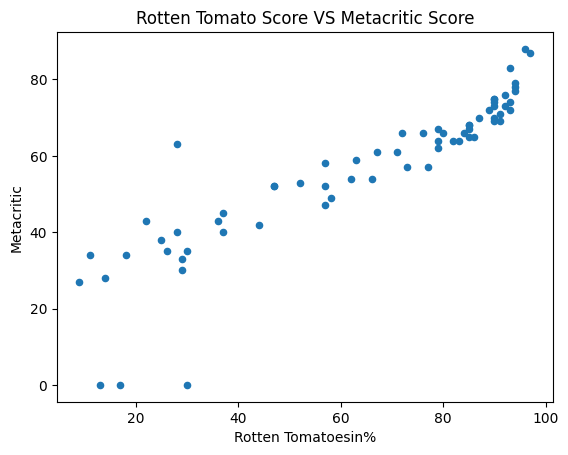

In [33]:
rt_mc_cor.plot(x ='Rotten Tomatoesin%', y = 'Metacritic', kind = 'scatter')
plt.title("Rotten Tomato Score VS Metacritic Score")

### Bar chart of the top 10 movies with the highest Rotten tomato score

In [25]:
film_rt_df = marvel_movie_df[['Film', 'Rotten Tomatoesin%']].sort_values(by = "Rotten Tomatoesin%", ascending = False).head(10)

Text(0, 0.5, 'Rotten Tomato Score')

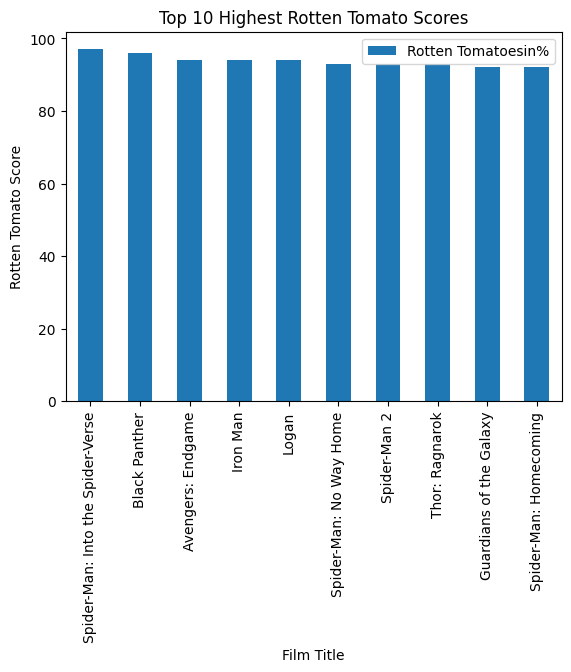

In [31]:
film_rt_df.plot.bar(x = "Film", y = "Rotten Tomatoesin%")
plt.title("Top 10 Highest Rotten Tomato Scores")
plt.xlabel("Film Title")
plt.ylabel("Rotten Tomato Score")

### Histogram of Cinema Score ratings

Text(0, 0.5, 'Rating Count')

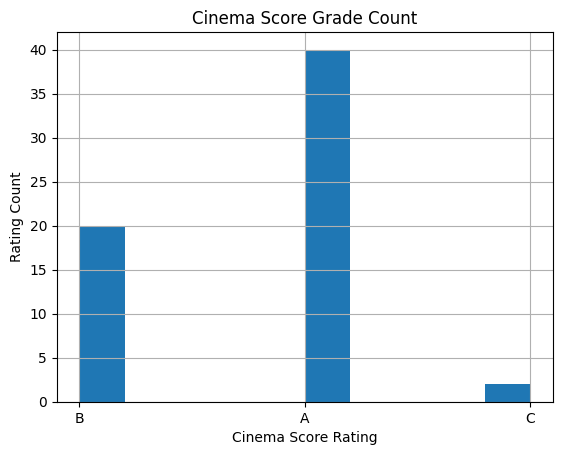

In [32]:
marvel_movie_df['CinemaScore'].hist()
plt.title("Cinema Score Grade Count")
plt.xlabel("Cinema Score Rating")
plt.ylabel("Rating Count")
